In [3]:
import pandas as pd
import numpy as np


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
students_performance = pd.read_csv("https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv")

In [ ]:
students_performance.head()

In [ ]:
# фильтрация записей по условию + вывод только некоторых столбцов
students_performance.loc[students_performance.gender == "female", ["gender", "writing score"]]

In [ ]:
# фильтрация по условию (простейший вариант)
mean_writing_score = students_performance['writing score'].mean()
students_performance[students_performance['writing score'] > mean_writing_score]

In [ ]:
# вычисление статистических характеристик
standard = students_performance[students_performance.lunch == 'standard']
reduced = students_performance[students_performance.lunch != 'standard']

print(standard["math score"].describe())
print(standard["reading score"].describe())
print(standard["writing score"].describe())
print("____________________________")
print(reduced["math score"].describe())
print(reduced["reading score"].describe())
print(reduced["writing score"].describe())

In [7]:
# переименование столбцов
students_performance = students_performance\
                                    .rename(columns=
                                            {'parental level of education': 'parental_level_of_education',
                                            'test preparation course': 'test_preparation_course',
                                            'math score': 'math_score',
                                            'reading score': 'reading_score',
                                            'writing score': 'writing_score'})

In [ ]:
# фильтрация записей по условию
writing_score_query = 78
students_performance.query("writing_score > @writing_score_query")

In [ ]:
# фильтрация по значениям переменных
scores = [i for i in list(students_performance) if 'score' in i]

In [ ]:
students_performance[scores]

In [ ]:
# фильтрация столбцов
students_performance.filter(like='score')

In [ ]:
# агрегация зависимых переменных по независимой
students_performance.groupby('gender', as_index=False).agg(
    mean_math_score=('math_score', 'mean'),
    mean_reading_score=('reading_score', 'mean')
    )

,gender,mean_math_score,mean_reading_score
0,female,63.633205,72.608108
1,male,68.728216,65.473029


In [ ]:
# агрегация по нескольким независимым переменным
students_performance.groupby(['gender', 'race/ethnicity'], as_index=False).agg(
    mean_math_score=('math_score', 'mean'),
    mean_reading_score=('reading_score', 'mean')
    )

In [ ]:
# мультииндексы
mean_scores = students_performance.groupby(['gender', 'race/ethnicity']).agg(
    mean_math_score=('math_score', 'mean'),
    mean_reading_score=('reading_score', 'mean')
    )
mean_scores.loc[[('female', 'group A'), ('female', 'group B')]]

In [ ]:
# находим топ-5 лучших студентов по математике с учётом пола (5 лучшиъ парней, 5 лучших девушек)
students_performance.sort_values(['gender', 'math_score'], ascending=False) \
        .groupby('gender').head(5)

In [ ]:
# добавление новых столбцов
students_performance['total_score'] = students_performance.math_score + students_performance.reading_score + students_performance.writing_score
students_performance.head()

In [ ]:
# добавление новых столбцов
students_performance = students_performance.assign(total_score_log = np.log(students_performance.total_score))
students_performance.head()

In [ ]:
# удаление столбцов
students_performance.drop(['total_score'], axis=1)
students_performance.head()

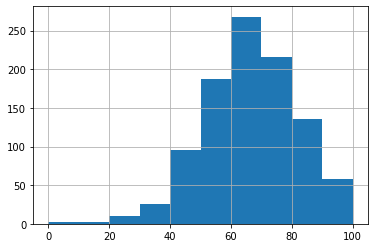

In [8]:
# визуализация встроенными средствами matplotlib и pandas
# строим гистограмму
students_performance.math_score.hist()

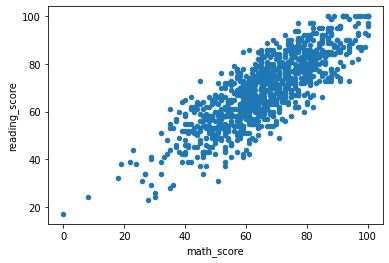

In [9]:
# СТРОИМ ГРАФИК КОРЕЛЛЯЦИИ МЕЖДУ ПЕРЕМЕННЫМИ
students_performance.plot.scatter(x='math_score', y='reading_score')

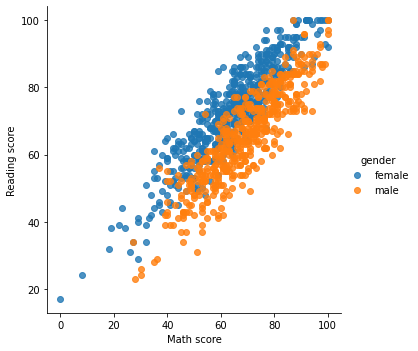

In [15]:
# построение графиков с помощью seaborn
# hue - группирующая переменная
ax = sns.lmplot(x='math_score', y='reading_score', hue='gender', data=students_performance, fit_reg=False)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')